In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [86]:
df=pd.read_csv("Mall_Customers.csv")

In [87]:
df.shape

(200, 5)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [92]:
X=df[['Annual Income (k$)','Spending Score (1-100)']].values

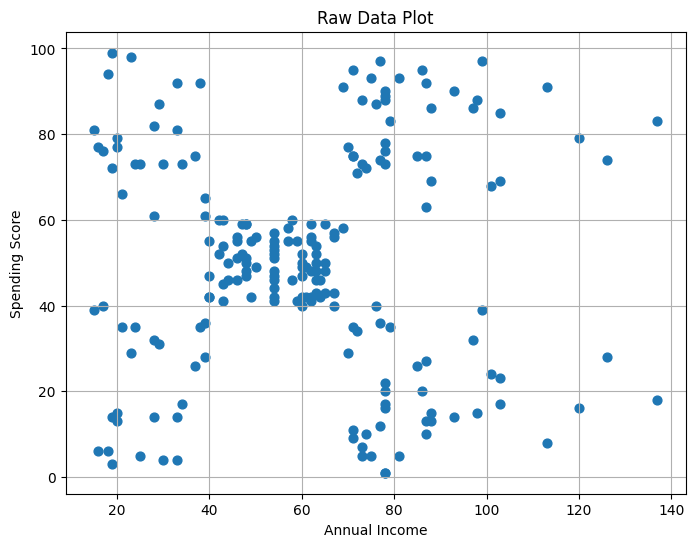

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s=40)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Raw Data Plot')
plt.grid(True)
plt.show()

In [94]:
ss=[]
k_range = range(1, 11)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)

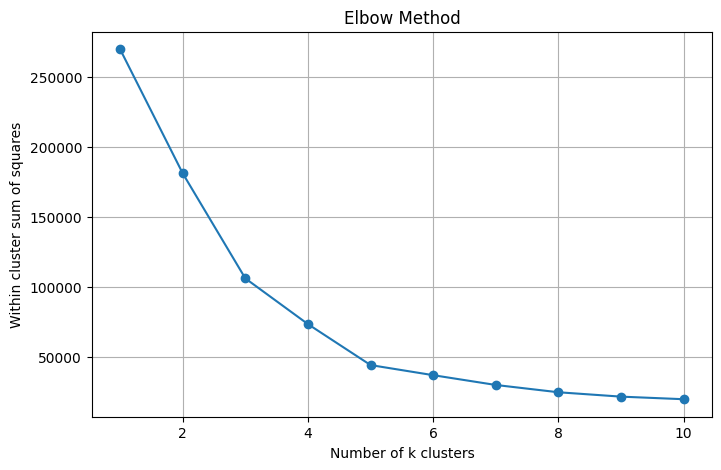

In [95]:
plt.figure(figsize=(8,5))
plt.plot(list(K_RANGE),ss, marker='o')
plt.xlabel('Number of k clusters')
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [96]:
k_opt=5
kmeans_scaled=KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels_km_scaled=kmeans_scaled.fit_predict(X)
centroids_scaled=kmeans_scaled.cluster_centers_

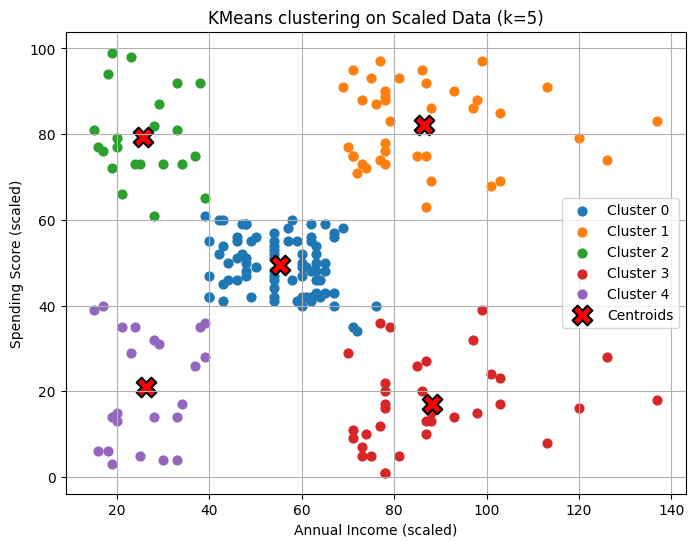

In [97]:
plt.figure(figsize=(8,6))
for i in range(k_opt):
    plt.scatter(X[labels_km_scaled==i, 0], X[labels_km_scaled==i, 1], s=40, label=f'Cluster {i}')
plt.scatter(centroids_scaled[:,0], centroids_scaled[:,1], s=200, marker='X', c='red', edgecolor='k', linewidth=1.5, label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title(f'KMeans clustering on Scaled Data (k={k_opt})')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
print('KMeans (data, k={}) silhouette score:'.format(k_opt),silhouette_score(X,labels_km_scaled))

KMeans (data, k=5) silhouette score: 0.553931997444648


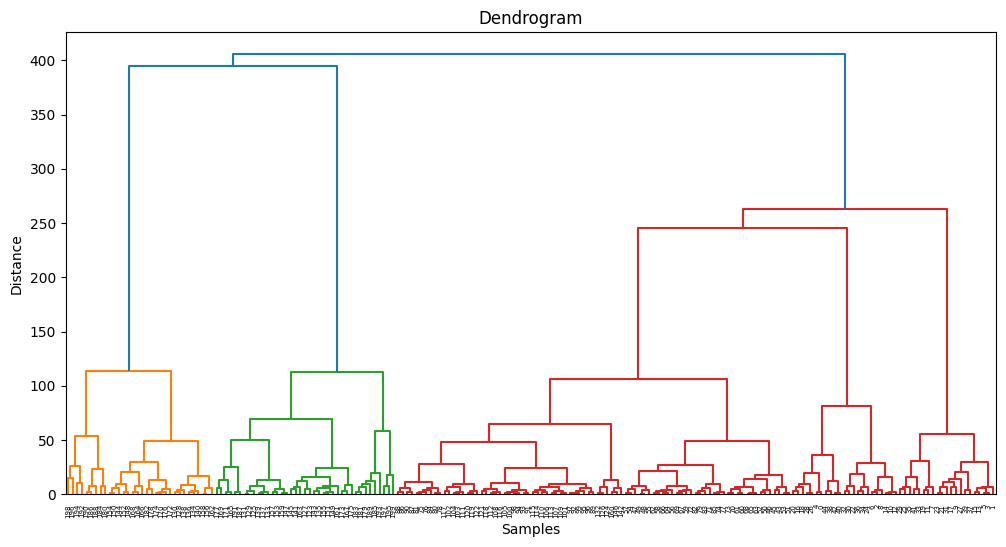

In [99]:
linked=linkage(X,method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [100]:
k_h=5
agg=AgglomerativeClustering(n_clusters=k_hier, linkage='ward')
labels_hier_scaled=agg.fit_predict(X)

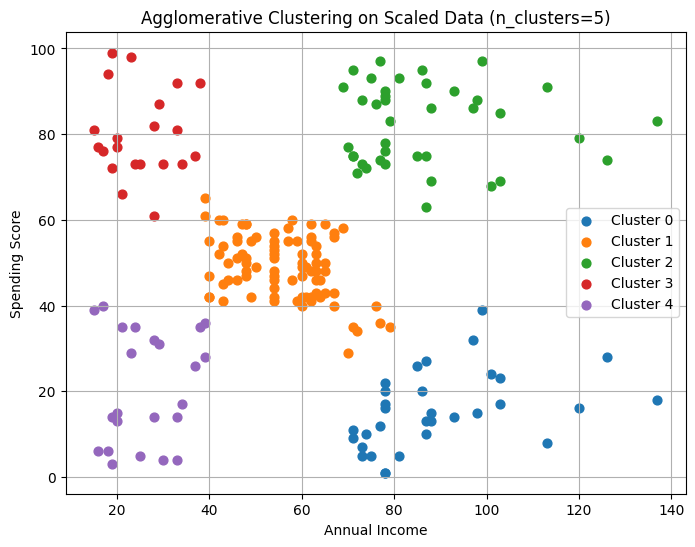

Agglomerative silhouette score : 0.5529945955148897


In [101]:
plt.figure(figsize=(8,6))
for i in range(k_h):
    plt.scatter(X[labels_hier_scaled==i,0], X[labels_hier_scaled==i,1], s=40, label=f'Cluster {i}')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'Agglomerative Clustering on Scaled Data (n_clusters={k_h})')
plt.legend()
plt.grid(True)
plt.show()
print('Agglomerative silhouette score :',silhouette_score(X, labels_hier_scaled))

## DBSCAN

In [102]:
min_s=5
nbrs=NearestNeighbors(n_neighbors=min_samples).fit(X)
distances,indices=nbrs.kneighbors(X)
k_dist=np.sort(distances[:, min_samples-1])

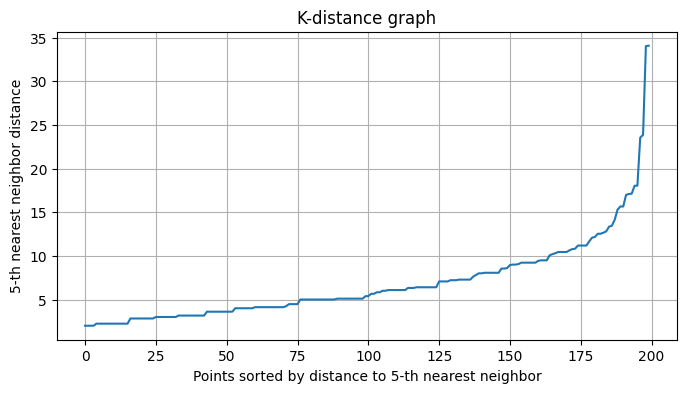

In [103]:
plt.figure(figsize=(8,4))
plt.plot(k_dist)
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(min_s))
plt.ylabel('{}-th nearest neighbor distance'.format(min_s))
plt.title('K-distance graph')
plt.grid(True)
plt.show()

In [104]:
db=DBSCAN(eps=10, min_samples=7)
labels_db = db.fit_predict(X)

In [105]:
n_clusters_db=len(set(labels_db))-(1 if -1 in labels_db else 0)
n_noise=list(labels_db).count(-1)
print('DBSCAN found clusters:',n_clusters_db,'and noise points:',n_noise)

DBSCAN found clusters: 5 and noise points: 23


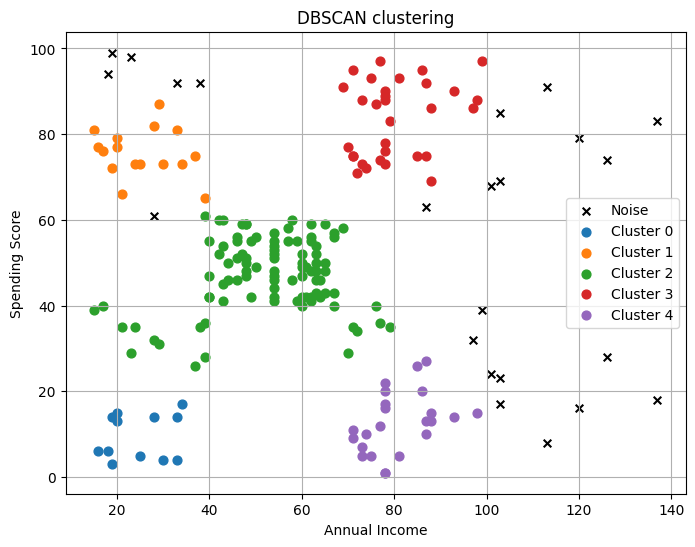

DBSCAN silhouette score: 0.42084049577844984


In [106]:
plt.figure(figsize=(8,6))
unique_labels = sorted(set(labels_db))
for lbl in unique_labels:
    if lbl==-1:
        plt.scatter(X[labels_db==lbl, 0],X[labels_db==lbl, 1],s=30,c='k',marker='x',label='Noise')
    else:
        plt.scatter(X[labels_db==lbl, 0], X[labels_db==lbl, 1], s=40, label=f'Cluster {lbl}')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN clustering')
plt.legend()
plt.grid(True)
plt.show()
try:
    if n_clusters_db>=2:
        print('DBSCAN silhouette score:',silhouette_score(X,labels_db))
    else:
        print('DBSCAN silhouette score: not applicable (less than 2 clusters)')
except Exception as e:
    print('Could not compute DBSCAN silhouette score:',e)